# Windturbines - Modelling and Control

![wind turbine](windturbine_photo.png "wind turbine")

source: Muller, S., Deicke, M., De Doncker, R.W. "Doubly Fed Induction Generator Systems for Wind Turbines". IEEE Industry Applications Magazine, May 2002. 

# AC generator - convert mechanical power into electrical power

Operating Priciple: A rotating magnetic field will induce (alternating) current in a coil of wire.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as manimation

In [ ]:
def plot_windings(ax, theta_m, theta_r=0, radius=5, is_rotor=False, add_arrows=True):
    theta_m = theta_m/180*np.pi
    theta_r = theta_r/180*np.pi

    rotor = patches.Circle((0,0), radius=radius, edgecolor='black', facecolor='none')   
    wire_a_in = patches.Circle(((radius+0.5)*np.cos(theta_r),(radius+0.5)*np.sin(theta_r)), radius=0.5, edgecolor='black', facecolor='red')
    wire_a_out = patches.Circle(((radius+0.5)*np.cos(theta_r+np.pi),(radius+0.5)*np.sin(theta_r+np.pi)), radius=0.5, edgecolor='black', facecolor='red')
    wire_b_in = patches.Circle(((radius+0.5)*np.cos(theta_r+60/180*np.pi),(radius+0.5)*np.sin(theta_r+60/180*np.pi)), radius=0.5, edgecolor='black', facecolor='blue')
    wire_b_out = patches.Circle(((radius+0.5)*np.cos(theta_r+240/180*np.pi),(radius+0.5)*np.sin(theta_r+240/180*np.pi)), radius=0.5, edgecolor='black', facecolor='blue')
    wire_c_in = patches.Circle(((radius+0.5)*np.cos(theta_r+120/180*np.pi),(radius+0.5)*np.sin(theta_r+120/180*np.pi)), radius=0.5, edgecolor='black', facecolor='green')
    wire_c_out = patches.Circle(((radius+0.5)*np.cos(theta_r+300/180*np.pi),(radius+0.5)*np.sin(theta_r+300/180*np.pi)), radius=0.5, edgecolor='black', facecolor='green')

    ax.add_patch(rotor)
    ax.add_patch(wire_a_in)
    ax.add_patch(wire_a_out)
    ax.add_patch(wire_b_in)
    ax.add_patch(wire_b_out)
    ax.add_patch(wire_c_in)
    ax.add_patch(wire_c_out)

    ax.plot([(radius+0.5)*np.cos(theta_r+60/180*np.pi),(radius+0.5)*np.cos(theta_r+240/180*np.pi)],[(radius+0.5)*np.sin(theta_r+60/180*np.pi),(radius+0.5)*np.sin(theta_r+240/180*np.pi)],'b--',alpha=0.5)
    ax.plot([(radius+0.5)*np.cos(theta_r+np.pi),(radius+0.5)*np.cos(theta_r)],[(radius+0.5)*np.sin(theta_r+np.pi),(radius+0.5)*np.sin(theta_r)],'r--',alpha=0.5)
    ax.plot([(radius+0.5)*np.cos(theta_r+120/180*np.pi),(radius+0.5)*np.cos(theta_r+300/180*np.pi)],[(radius+0.5)*np.sin(theta_r+120/180*np.pi),(radius+0.5)*np.sin(theta_r+300/180*np.pi)],'g--',alpha=0.5)

    if is_rotor:
        ax.plot([-radius*np.cos(theta_r), radius*np.cos(theta_r)], [-radius*np.sin(theta_r), radius*np.sin(theta_r)])


    if add_arrows:
        theta = theta_m+theta_r
        label_space = 1.05
        ax.arrow(0,0,r*np.cos(theta),r*np.sin(theta),width=0.1,length_includes_head=True)
        ax.text(label_space*r*np.cos(theta),label_space*r*np.sin(theta),r'$\vec{B}$')

        ra = r*np.sin(theta_m)
        ax.arrow(0,0,ra*np.cos(theta_r+np.pi/2),ra*np.sin(theta_r+np.pi/2),width=0.1,length_includes_head=True,color='red')
        ax.text(label_space*ra*np.cos(theta_r+np.pi/2),label_space*ra*np.sin(theta_r+np.pi/2),r'$\vec{B}_r$', color='red')
        
        rb = r*np.sin(theta_m-120/180*np.pi)
        ax.arrow(0,0,rb*np.cos(theta_r+2*np.pi/3+np.pi/2),rb*np.sin(theta_r+2*np.pi/3+np.pi/2),width=0.1,length_includes_head=True,color='green')
        ax.text(label_space*rb*np.cos(theta_r+2*np.pi/3+np.pi/2),label_space*rb*np.sin(theta_r+2*np.pi/3+np.pi/2),r'$\vec{B}_g$', color='green')

        rc = r*np.sin(theta_m+120/180*np.pi)
        ax.arrow(0,0,rc*np.cos(theta_r-2*np.pi/3+np.pi/2),rc*np.sin(theta_r-2*np.pi/3+np.pi/2),width=0.1,length_includes_head=True,color='blue')
        ax.text(label_space*rc*np.cos(theta_r-2*np.pi/3+np.pi/2),label_space*rc*np.sin(theta_r-2*np.pi/3+np.pi/2),r'$\vec{B}_b$', color='blue')


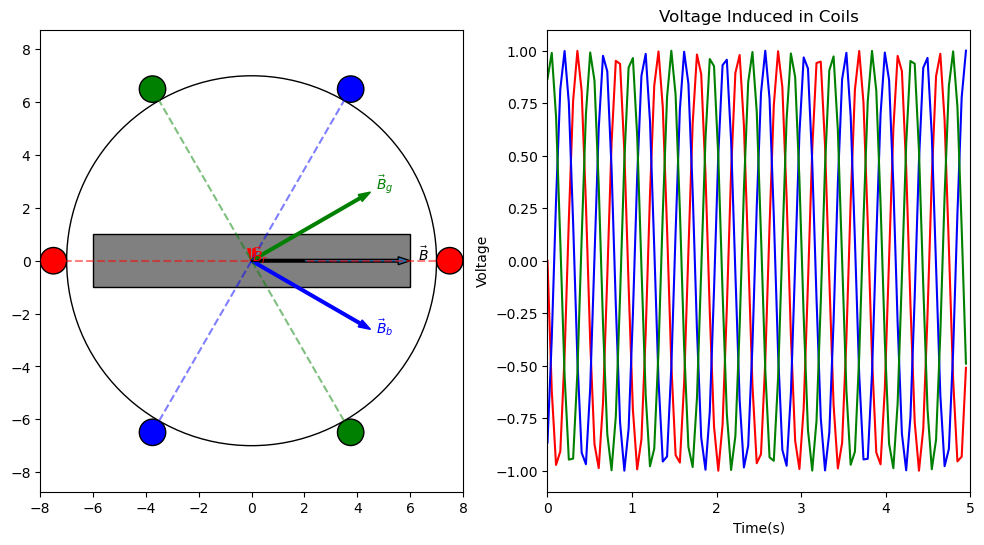

In [2]:
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='AC Machine with PM', artist='Matplotlib',
                comment='AC Machine with PM')
writer = FFMpegWriter(fps=5, metadata=metadata)

fig,ax=plt.subplots(1,2,figsize=(12,6))

r = 6


stator = patches.Circle((0,0), radius=7, edgecolor='black', facecolor='white')

wire_a_in = patches.Circle((7.5,0), radius=0.5, edgecolor='black', facecolor='red')
wire_a_out = patches.Circle((-7.5,0), radius=0.5, edgecolor='black', facecolor='red')
wire_b_in = patches.Circle((7.5*np.cos(60/180*np.pi),7.5*np.sin(60/180*np.pi)), radius=0.5, edgecolor='black', facecolor='blue')
wire_b_out = patches.Circle((7.5*np.cos(240/180*np.pi),7.5*np.sin(240/180*np.pi)), radius=0.5, edgecolor='black', facecolor='blue')
wire_c_in = patches.Circle((7.5*np.cos(120/180*np.pi),7.5*np.sin(120/180*np.pi)), radius=0.5, edgecolor='black', facecolor='green')
wire_c_out = patches.Circle((7.5*np.cos(300/180*np.pi),7.5*np.sin(300/180*np.pi)), radius=0.5, edgecolor='black', facecolor='green')


num_frames = 100
f = 1
t_end=5
t = np.linspace(0,t_end,num_frames)
omega_t_vec = 360*f*t
cnt = 0

ea = np.sin(omega_t_vec)
eb = np.sin(omega_t_vec - 120/180*np.pi)
ec = np.sin(omega_t_vec + 120/180*np.pi)


with writer.saving(fig, "windturbinePM.mp4", num_frames):
    for theta in omega_t_vec: 
        ax[0].clear()
        ax[1].clear()
        
        rotor = patches.Rectangle((-r,-1), 2*r, 2, angle=theta, edgecolor='black', facecolor='gray',rotation_point='center')

        ax[0].add_patch(stator)
        ax[0].add_patch(rotor)
        ax[0].add_patch(wire_a_in)
        ax[0].add_patch(wire_a_out)
        ax[0].add_patch(wire_b_in)
        ax[0].add_patch(wire_b_out)
        ax[0].add_patch(wire_c_in)
        ax[0].add_patch(wire_c_out)

        ax[0].plot([7.5*np.cos(60/180*np.pi),7.5*np.cos(240/180*np.pi)],[7.5*np.sin(60/180*np.pi),7.5*np.sin(240/180*np.pi)],'b--',alpha=0.5)
        ax[0].plot([-7.5,7.5],[0,0],'r--',alpha=0.5)
        ax[0].plot([7.5*np.cos(120/180*np.pi),7.5*np.cos(300/180*np.pi)],[7.5*np.sin(120/180*np.pi),7.5*np.sin(300/180*np.pi)],'g--',alpha=0.5)

        ax[0].axis('equal')
        ax[0].set_xlim(-8,8)
        ax[0].set_ylim(-8,8)

        label_space = 1.05
        ax[0].arrow(0,0,r*np.cos(theta/180*np.pi),r*np.sin(theta/180*np.pi),width=0.1,length_includes_head=True)
        ax[0].text(label_space*r*np.cos(theta/180*np.pi),label_space*r*np.sin(theta/180*np.pi),r'$\vec{B}$')

        ax[0].arrow(0,0,0,r*np.sin(theta/180*np.pi),width=0.1,length_includes_head=True,color='red')
        ax[0].text(0,label_space*r*np.sin(theta/180*np.pi),r'$\vec{B}_r$', color='red')
        
        rb = r*np.sin(theta/180*np.pi-120/180*np.pi)
        ax[0].arrow(0,0,-rb*np.cos(np.pi/6),-rb*np.sin(np.pi/6),width=0.1,length_includes_head=True,color='green')
        ax[0].text(-label_space*rb*np.cos(np.pi/6),-label_space*rb*np.sin(np.pi/6),r'$\vec{B}_g$', color='green')

        rc = r*np.sin(theta/180*np.pi+120/180*np.pi)
        ax[0].arrow(0,0,rc*np.cos(np.pi/6),-rc*np.sin(np.pi/6),width=0.1,length_includes_head=True,color='blue')
        ax[0].text(label_space*rc*np.cos(np.pi/6),-label_space*rc*np.sin(np.pi/6),r'$\vec{B}_b$', color='blue')


        ax[0].plot([0,2],[0,0],'k')


        ax[1].plot(t[0:cnt],ea[0:cnt],'red')
        ax[1].plot(t[0:cnt],eb[0:cnt],'blue')
        ax[1].plot(t[0:cnt],ec[0:cnt],'green')
        ax[1].set_xlim([0,t_end])
        ax[1].set_xlabel('Time(s)')
        ax[1].set_title('Voltage Induced in Coils')
        ax[1].set_ylabel('Voltage')
        cnt+=1
        
        writer.grab_frame()




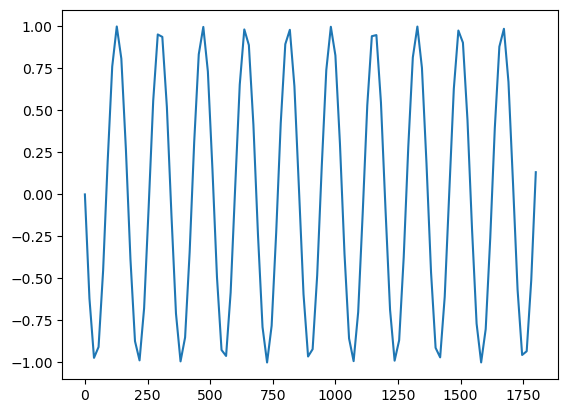

In [7]:
fig,ax=plt.subplots(1)
ax.plot(,ea)

In [7]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="windturbinePM.mp4" type="video/mp4">
</video></div>""")

# Faraday's Law

Let:
- $\vec{\phi}$ be magnetic flux
- $e$ is voltage across wire
- $\vec{B}$ be magnetic flux density: $B = \vec{\phi}/A$
- $\ell$ is length of wire
- $\vec{v}$ is velocity of wire

The voltage induced in a coil of wire is equal to the negative of the rate of change of the magnetic flux enclosed by the coil:
$$
e = -\frac{\text{d}\phi}{\text{d}t}
$$
In this formula, magnetic flux is assumed to be perpendicular to the surface enclosed by the coil. 

Alternatively, moving a conductor through a magnetic field will induce a voltage in the conductor:
$$
e = (\vec{v} \times \vec{B}) \cdot \ell
$$

# Example

Consider a magnet rotating as shown in figure:
$$
\begin{align*}
\vec{B} &= B\angle (\omega t) \\
&= B \cos(\omega t)\hat{i} + B \sin(\omega t) \hat{j}
\end{align*}
$$
where $\omega$ is angular velocity of magnet, $\hat{i}$ and $\hat{j}$ are unit vectors in the x and y direction respectively. 




# Red Coil

Magnitude of magnetic flux density perpendicular to red coil:
$$
B_r = B \sin(\omega t) 
$$
Total flux through red coil: 
$$
\vec{\phi} = \vec{B}_rA = r\ell\vec{B}_r
$$

Then, from Faraday's Law we have that the voltage incuded in the red coil is:
$$
\begin{align*}
e_r &= -\frac{\text{d}\phi}{\text{d}t} \\
&= -\frac{\text{d}}{\text{d}t} r\ell B \sin(\omega t) \\
&= - r \ell B \omega \cos(\omega t)
\end{align*}

# Green Coil

Magnitude of magnetic flux density perpendicular to green coil:
$$
B_g = B \sin(\omega t-\frac{2\pi}{3}) 
$$

Then, from Faraday's Law we have that the voltage incuded in the green coil is:
$$
\begin{align*}
e_g &= -\frac{\text{d}\phi}{\text{d}t} \\
&= -\frac{\text{d}}{\text{d}t} r\ell B \sin(\omega t-\frac{2\pi}{3}) \\
&= -r \ell B \omega \cos(\omega t-\frac{2\pi}{3})
\end{align*}

# Blue Coil

Magnitude of magnetic flux density perpendicular to blue coil:
$$
B_b = B \sin(\omega t+\frac{2\pi}{3}) 
$$

Then, from Faraday's Law we have that the voltage incuded in the blue coil is:
$$
\begin{align*}
e_b &= -\frac{\text{d}\phi}{\text{d}t} \\
&= -\frac{\text{d}}{\text{d}t} r\ell B \sin(\omega t+\frac{2\pi}{3}) \\
&= -r \ell B \omega \cos(\omega t+\frac{2\pi}{3})
\end{align*}

# Direct In-Line Wind Turbine

Note that the frequency of the produced voltage/current is the same as the mechanical frequency of rotation of the rotor.

When connected to the grid, need electrical frequency to be $60$Hz. 

Solution:
Convert AC (at mechanical frequency of rotor) to DC, then convert DC into AC with ferquency $60$Hz and grid voltage. 

![wind turbine](directlyconnected.png "wind turbine")

source: Muller, S., Deicke, M., De Doncker, R.W. "Doubly Fed Induction Generator Systems for Wind Turbines". IEEE Industry Applications Magazine, May 2002. 

Problem:
All the power generated by the wind turbin passes through the AC-DC and DC-AC converters. This results in large and expensive power electronics.

# Ampere's Law

Interesting fact: In the previous reasoning, I selected rotation of the magnetic field as the input and induced voltage in the coils as the output. However, we can also select voltages in the coils as the inputs, and the induced magnetic field as the output. THis is a variation of Ampere's Law.

Ampere's Law:
$$
\phi = \frac{N}{\mathcal{R}} i(t)
$$
where:
- $\phi$ is magnetic flux through a coil (it is a vector perpendicular to the surface of the coil)
- $N$ is the number of turns in the coil
- $\mathcal{R}$ is the reluctance
- $i(t)$ is the current in the coil



By applying alternating 3-phase current to the 3 coils, a rotating magnetic field can be produced:
$$
\begin{align*}
\vec{\phi_r} &= \frac{N}{\mathcal{R}}i_r(t) \\
&=\frac{N}{\mathcal{R}}\sin(\omega t)\angle 90 \\
&=\frac{N}{\mathcal{R}}\sin(\omega t)\hat{j} \\
\vec{\phi_g}&= \frac{N}{\mathcal{R}}i_g(t) \\
&=\frac{N}{\mathcal{R}}\sin(\omega t-\frac{2\pi}{3})\angle 210 \\
&=\frac{N}{\mathcal{R}}\sin(\omega t-\frac{2\pi}{3})(-\cos(\pi/6)\hat{i}-\sin(\pi/6)\hat{j} )\\
\vec{\phi_b}&= \frac{N}{\mathcal{R}}i_b(t) \\
&=\frac{N}{\mathcal{R}}\sin(\omega t+\frac{2\pi}{3})\angle -30 \\
&=\frac{N}{\mathcal{R}}\sin(\omega t+\frac{2\pi}{3})(\cos(\pi/6)\hat{i}-\sin(\pi/6)\hat{j} )
\end{align*}
$$


Adding induced magnetic fields together results in (after some trigonometry):
$$
\begin{align*}
\vec{\phi}_r + \vec{\phi}_g + \vec{\phi}_b &= \frac{3}{2}\frac{N}{\mathcal{R}}\cos(\omega t)\hat{i} + \frac{3}{2}\frac{N}{\mathcal{R}}\sin(\omega t)\hat{j}\\
&= \frac{3}{2}\frac{N}{\mathcal{R}}\angle \omega t
\end{align*}
$$

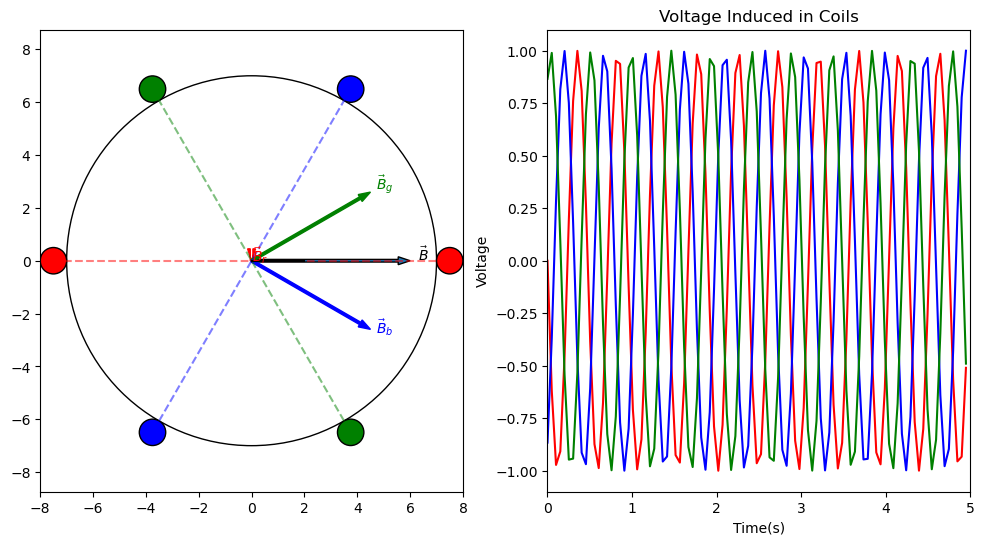

In [13]:
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='AC Machine stator', artist='Matplotlib',
                comment='AC Machine stator')
writer = FFMpegWriter(fps=5, metadata=metadata)

fig,ax=plt.subplots(1,2,figsize=(12,6))

r = 6


stator = patches.Circle((0,0), radius=7, edgecolor='black', facecolor='white')

wire_a_in = patches.Circle((7.5,0), radius=0.5, edgecolor='black', facecolor='red')
wire_a_out = patches.Circle((-7.5,0), radius=0.5, edgecolor='black', facecolor='red')
wire_b_in = patches.Circle((7.5*np.cos(60/180*np.pi),7.5*np.sin(60/180*np.pi)), radius=0.5, edgecolor='black', facecolor='blue')
wire_b_out = patches.Circle((7.5*np.cos(240/180*np.pi),7.5*np.sin(240/180*np.pi)), radius=0.5, edgecolor='black', facecolor='blue')
wire_c_in = patches.Circle((7.5*np.cos(120/180*np.pi),7.5*np.sin(120/180*np.pi)), radius=0.5, edgecolor='black', facecolor='green')
wire_c_out = patches.Circle((7.5*np.cos(300/180*np.pi),7.5*np.sin(300/180*np.pi)), radius=0.5, edgecolor='black', facecolor='green')


num_frames = 100
f = 1
t_end=5
t = np.linspace(0,t_end,num_frames)
omega_t_vec = 360*f*t
cnt = 0

ea = np.sin(omega_t_vec)
eb = np.sin(omega_t_vec - 120/180*np.pi)
ec = np.sin(omega_t_vec + 120/180*np.pi)


with writer.saving(fig, "stator.mp4", num_frames):
    for theta in omega_t_vec: 
        ax[0].clear()
        ax[1].clear()
        
        #rotor = patches.Rectangle((-r,-1), 2*r, 2, angle=theta, edgecolor='black', facecolor='gray',rotation_point='center')

        ax[0].add_patch(stator)
        #ax[0].add_patch(rotor)
        ax[0].add_patch(wire_a_in)
        ax[0].add_patch(wire_a_out)
        ax[0].add_patch(wire_b_in)
        ax[0].add_patch(wire_b_out)
        ax[0].add_patch(wire_c_in)
        ax[0].add_patch(wire_c_out)

        ax[0].plot([7.5*np.cos(60/180*np.pi),7.5*np.cos(240/180*np.pi)],[7.5*np.sin(60/180*np.pi),7.5*np.sin(240/180*np.pi)],'b--',alpha=0.5)
        ax[0].plot([-7.5,7.5],[0,0],'r--',alpha=0.5)
        ax[0].plot([7.5*np.cos(120/180*np.pi),7.5*np.cos(300/180*np.pi)],[7.5*np.sin(120/180*np.pi),7.5*np.sin(300/180*np.pi)],'g--',alpha=0.5)

        ax[0].axis('equal')
        ax[0].set_xlim(-8,8)
        ax[0].set_ylim(-8,8)

        label_space = 1.05
        ax[0].arrow(0,0,r*np.cos(theta/180*np.pi),r*np.sin(theta/180*np.pi),width=0.1,length_includes_head=True)
        ax[0].text(label_space*r*np.cos(theta/180*np.pi),label_space*r*np.sin(theta/180*np.pi),r'$\vec{B}$')

        ax[0].arrow(0,0,0,r*np.sin(theta/180*np.pi),width=0.1,length_includes_head=True,color='red')
        ax[0].text(0,label_space*r*np.sin(theta/180*np.pi),r'$\vec{B}_r$', color='red')
        
        rb = r*np.sin(theta/180*np.pi-120/180*np.pi)
        ax[0].arrow(0,0,-rb*np.cos(np.pi/6),-rb*np.sin(np.pi/6),width=0.1,length_includes_head=True,color='green')
        ax[0].text(-label_space*rb*np.cos(np.pi/6),-label_space*rb*np.sin(np.pi/6),r'$\vec{B}_g$', color='green')

        rc = r*np.sin(theta/180*np.pi+120/180*np.pi)
        ax[0].arrow(0,0,rc*np.cos(np.pi/6),-rc*np.sin(np.pi/6),width=0.1,length_includes_head=True,color='blue')
        ax[0].text(label_space*rc*np.cos(np.pi/6),-label_space*rc*np.sin(np.pi/6),r'$\vec{B}_b$', color='blue')


        ax[0].plot([0,2],[0,0],'k')


        ax[1].plot(t[0:cnt],ea[0:cnt],'red')
        ax[1].plot(t[0:cnt],eb[0:cnt],'blue')
        ax[1].plot(t[0:cnt],ec[0:cnt],'green')
        ax[1].set_xlim([0,t_end])
        ax[1].set_xlabel('Time(s)')
        ax[1].set_title('Voltage Induced in Coils')
        ax[1].set_ylabel('Voltage')
        cnt+=1
        
        writer.grab_frame()




In [10]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="stator.mp4" type="video/mp4">
</video></div>""")

# Doubly Fed Induction Generator

![wind turbine](dfig.png "wind turbine")

source: Muller, S., Deicke, M., De Doncker, R.W. "Doubly Fed Induction Generator Systems for Wind Turbines". IEEE Industry Applications Magazine, May 2002. 

Observations:
- Stator is directly connected to grid
- Rotor is also connected to grid, but through AC-DC and DC-AC converters
- Power can flow from stator to grid, and sometimes from rotor to grid. This means that only a small portion of the power flows through the power electronics, which in turn means that the power electronics can be much smaller and cheaper.

Question:
- The frequency of the grid is 60Hz, what is the rotor is not spinning at exactly 60Hz?


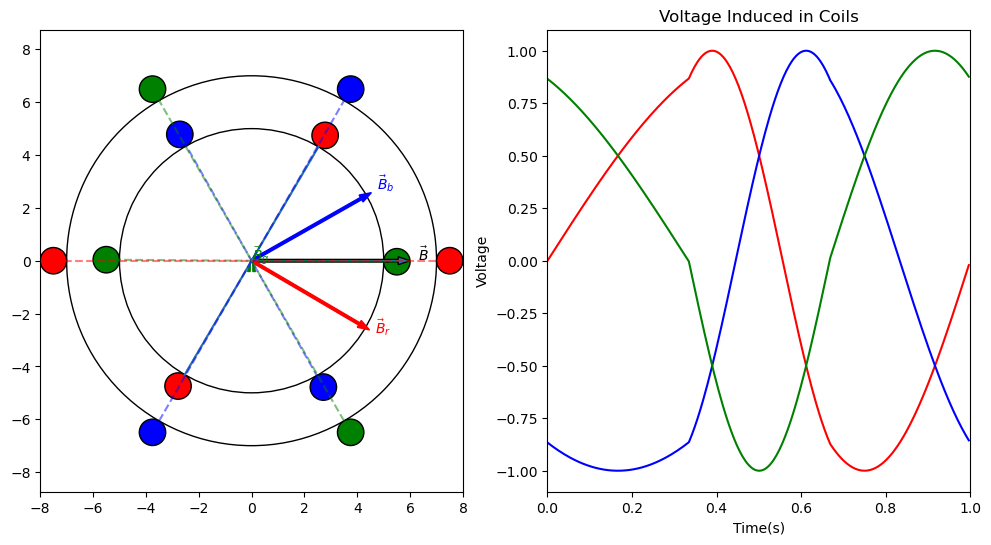

In [22]:
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='AC Machine stator', artist='Matplotlib',
                comment='AC Machine stator')
writer = FFMpegWriter(fps=5, metadata=metadata)

fig,ax=plt.subplots(1,2,figsize=(12,6))

r = 6



num_frames = 300
f_r = 1
t_end=1
t = np.linspace(0,t_end,num_frames)
omega_r_t_vec = np.concatenate((np.zeros(int(num_frames/3)),360*f_r*t[0:int(2*num_frames/3)]))

f_m = 0.5
omega_m_t_vec = np.concatenate((360*f_m*t[0:int(2*num_frames/3)],360*f_m*t[int(2*num_frames/3)]*np.ones(int(num_frames/3))))
cnt = 0

es_a = np.sin((omega_m_t_vec+omega_r_t_vec)/180*np.pi)
es_b = np.sin(omega_m_t_vec/180*np.pi+omega_r_t_vec/180*np.pi - 120/180*np.pi)
es_c = np.sin(omega_m_t_vec/180*np.pi+omega_r_t_vec/180*np.pi + 120/180*np.pi)

er_a = np.sin(omega_r_t_vec/180*np.pi)
er_b = np.sin(omega_r_t_vec/180*np.pi - 120/180*np.pi)
er_c = np.sin(omega_r_t_vec/180*np.pi + 120/180*np.pi)

with writer.saving(fig, "rotor.mp4", num_frames):
    for theta in omega_r_t_vec: 
        ax[0].clear()
        ax[1].clear()

        plot_windings(ax[0],theta_m=omega_m_t_vec[cnt], theta_r=theta, is_rotor=True)
        plot_windings(ax[0],theta_m=0, radius=7, add_arrows=False)        

        ax[0].axis('equal')
        ax[0].set_xlim(-8,8)
        ax[0].set_ylim(-8,8)

        ax[1].plot(t[0:cnt],es_a[0:cnt],'red')
        ax[1].plot(t[0:cnt],es_b[0:cnt],'blue')
        ax[1].plot(t[0:cnt],es_c[0:cnt],'green')
        ax[1].set_xlim([0,t_end])
        ax[1].set_xlabel('Time(s)')
        ax[1].set_title('Voltage Induced in Coils')
        ax[1].set_ylabel('Voltage')
        cnt+=1
        
        writer.grab_frame()




In [21]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="rotor.mp4" type="video/mp4">
</video></div>""")

# Doubly Feb Induction Generator

![wind turbine](dfig.png "wind turbine")

source: Muller, S., Deicke, M., De Doncker, R.W. "Doubly Fed Induction Generator Systems for Wind Turbines". IEEE Industry Applications Magazine, May 2002. 

- Both stator and rotor are connected to grid.
- A magnetic field is generated by windings of the stator, and the windings of the rotor.
- The stator is directly connected to the grid, and so voltage and frequency in the stator must/will oscillate at the voltage and frequency of the grid.
- Power is injected into the grid by generating current in the windings of the stator. 


# Total Megnetic Flux

The total flux induced by the 3-phase alternating current in the rotor is:
$$
\vec{\phi}_r = \vec{\phi_{ra}} + \vec{\phi_{rb}} + \vec{\phi_{rc}}
$$

The total flux induced by the 3-phase alternating current in the stator is:
$$
\vec{\phi}_s = \vec{\phi_{sa}} + \vec{\phi_{sb}} + \vec{\phi_{sc}}
$$

The total flux in the air gap between the stator and the rotor is the sum of both fluxes.

On the stator side of the air gap the total magnetic flux is:
$$
\vec{\phi}_S = \vec{\phi}_s + \kappa \vec{\phi}_r
$$
where $\kappa$ is a leakage term due to the air gap between the rotor and the stator.

On the rotor side of the air gap, the total magnetic flux is:
$$
\vec{\phi}_R = \vec{\phi}_r + \kappa \vec{\phi}_s
$$
where $\kappa$ is the same leakage term, but working in the opposite direction (from stator to rotor).

# Circuit diagram of rotor and stator



# Connecting generator to shaft

- We have a model for the generator dynamics
- We have a model for the turbine blades and shaft
- Need to connect them together!

Torque equation:
$$
J \frac{\text{d}^2\theta}{\text{d}t} = T_m - T_e
$$
where 
- $T_m$ is mechanical torque coming from the turbine shaft
- $T_e$ is electrical torque due to electromagnetic field